0.019588012009272404 -0.12974197660060582


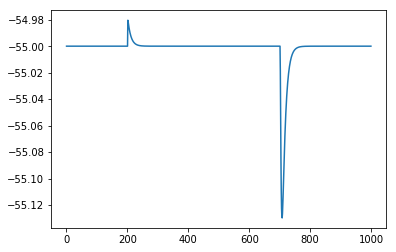

In [2]:
import nest
import numpy as np
import pylab as pl


params =  {
    "C_m": 250.0,
    "E_L": -70.0,
    "t_ref": 2.0,
    "tau_m": 10.0,
    "tau_minus": 20.0,
    "tau_syn_ex": 0.2,
    "tau_syn_in": 2.0,
    "V_reset": -70.0,
    "V_th": -55.0
}

g_L = params['C_m'] / params['tau_m']
I_th = (params['V_th'] - params['E_L']) * g_L
Vth = params['V_th']

nest.ResetKernel()

n = nest.Create('iaf_psc_alpha', params=params)

sg = nest.Create('spike_generator')
vm = nest.Create('voltmeter')

nest.Connect(sg, n, syn_spec={'weight': 10.0})
nest.Connect(vm, n)

nest.SetStatus(n, {'V_th': 0., 'I_e': I_th, 'V_m': Vth})
nest.SetStatus(sg, {'spike_times': [200., 700.], 'spike_weights': [1., -1.]})
nest.Simulate(1000.)

events = nest.GetStatus(vm, 'events')[0]
times, V_m = events['times'], events['V_m']

print(np.max(V_m) - Vth, np.min(V_m) - Vth)
pl.plot(times,V_m)
pl.show()


['',
 '/opt/nest/lib/python3.6/site-packages',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/home/spreizer/.local/lib/python3.6/site-packages',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python3/dist-packages/IPython/extensions',
 '/home/spreizer/.ipython']